In [27]:
import pandas as pd
import numpy as np
from numpy import isnan
from collections import Counter
from sklearn.metrics import confusion_matrix

from computeNutriScore import computeNutriScore

DATA_FOLDER = './data/'

In [28]:
# Load Data and Clean
Data_raw = pd.read_csv(DATA_FOLDER + 'en.openfoodfacts.org.products.csv', delimiter = '\t', low_memory = False)

Data_raw.drop_duplicates(subset = 'code', keep = False, inplace = True)
Data_raw.set_index('code', inplace = True)

#Drop all the row and column with all NaN
Data_raw.dropna(axis = 0, how = 'all', inplace = True)
Data_raw.dropna(axis = 1, how = 'all', inplace = True)

Data_raw = Data_raw[~Data_raw.product_name.isna()]

In [29]:
column_for_Nutri_Score_Computation = ['categories_tags','energy_100g','fat_100g','saturated-fat_100g','sugars_100g',
'salt_100g','sodium_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-estimate_100g','nutrition-score-fr_100g',
'nutrition-score-uk_100g','fiber_100g','proteins_100g', 'nutrition_grade_fr']

column_for_Nutri_Score_Computation_light = ['categories_tags','energy_100g','fat_100g','saturated-fat_100g',
                                            'sugars_100g','salt_100g','sodium_100g','fruits-vegetables-nuts_100g',
                                            'fruits-vegetables-nuts-estimate_100g','fiber_100g','proteins_100g']

Food_data_set = Data_raw[column_for_Nutri_Score_Computation].copy()
#Food_data_set.dropna(axis = 0, how = 'all', inplace = True)

#pour Remi : aliments à completer si il n'y a pas de valeur dans une colonne hormis nutrition-score-fr_100g,
#nutrition-score-uk_100g et nutrition_grade_fr (ceci c'est Valentin qui complete)
Food_data_set_light = Data_raw[column_for_Nutri_Score_Computation_light].copy()
df_to_complete = Food_data_set_light[~Food_data_set_light.categories_tags.isna()].copy()

#pour Valentin : aliment avec déjà nutriScore
Food_data_set_to_verify_score = Food_data_set[~Food_data_set.nutrition_grade_fr.isna()].copy()

In [12]:
print("The proportion of Data with already Nutri Score : {} %".format(len(Food_data_set_to_verify_score) * 100 / len(Food_data_set)))

The proportion of Data with already Nutri Score : 19.613574908575444 %


In [13]:
product = Food_data_set_to_verify_score.iloc[[1]]
product.categories_tags.str.contains('beverages', case=False)

code
0000000001885    True
Name: categories_tags, dtype: bool

In [4]:
Food_data_set_to_verify_score['Predicted_NutriScore_grade'] = np.nan
Food_data_set_to_verify_score['Predicted_NutriScore_score'] = np.nan

for index in range(len(Food_data_set_to_verify_score)):
    product = Food_data_set_to_verify_score.iloc[[index]]
    nutriscore, final_score = computeNutriScore(product)
    Food_data_set_to_verify_score.loc[product.index[0], 'Predicted_NutriScore_grade'] = nutriscore
    Food_data_set_to_verify_score.loc[product.index[0], 'Predicted_NutriScore_score'] = final_score

In [14]:
y_true = Food_data_set_to_verify_score['nutrition_grade_fr']
y_pred = Food_data_set_to_verify_score['Predicted_NutriScore_grade']
confusion_matrix(y_true, y_pred, labels=['a', 'b', 'c', 'd', 'e', 'Error'])

KeyError: 'Predicted_NutriScore_grade'

In [8]:
Food_data_set_to_verify_score[Food_data_set_to_verify_score['nutrition_grade_fr'] != Food_data_set_to_verify_score['Predicted_NutriScore_grade']]

,categories_tags,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,proteins_100g,nutrition_grade_fr,Predicted_NutriScore_grade,Predicted_NutriScore_score
code,,,,,,,,,,,,,,,,
0000000001885,"en:plant-based-foods-and-beverages,en:plant-ba...",657.0,0.00,0.0000,27.00,0.000000,0.000000,NaN,NaN,-4.0,-4.0,3.60,0.600,a,d,10.0
0000000005470,"en:plant-based-foods-and-beverages,en:plant-ba...",669.0,2.20,0.5000,0.60,0.358000,0.140945,NaN,NaN,-4.0,-4.0,1.60,9.500,a,Error,11.0
0000000005661,"en:seafood,en:fishes,en:salmons,en:smoked-fish...",1059.0,17.00,2.6000,0.50,2.500000,0.984252,NaN,NaN,15.0,15.0,NaN,23.000,d,Error,1005.0
0000000290616,"en:plant-based-foods-and-beverages,en:plant-ba...",1210.0,12.00,7.0000,0.00,2.160000,0.850000,NaN,NaN,6.0,6.0,2.00,22.000,c,b,0.0
0000007020254,"en:beverages,en:carbonated-drinks,en:sodas,en:...",213.0,0.00,0.0000,0.00,1.000000,0.393701,NaN,NaN,12.0,4.0,0.00,0.000,e,d,8.0
0000007818707,"en:beverages,en:non-alcoholic-beverages",201.0,0.00,0.0000,12.70,0.050000,0.019685,NaN,NaN,16.0,2.0,NaN,0.000,e,Error,16.0
0000009125124,"en:plant-based-foods-and-beverages,en:plant-ba...",1577.0,0.50,0.1000,66.00,0.020000,0.007874,NaN,76.00,1.0,1.0,NaN,1.500,b,Error,16.0
0000009336247,"en:sugary-snacks,en:confectioneries,en:candies",1674.0,0.00,0.0000,93.30,0.000000,0.000000,NaN,NaN,14.0,14.0,NaN,0.000,d,Error,1004.0
0000010166697,"en:marzipan,en:almond-paste",1732.0,10.29,0.7700,69.97,0.210000,0.082677,NaN,20.10,15.0,15.0,NaN,4.200,d,Error,1005.0


In [9]:
len(Food_data_set_to_verify_score[Food_data_set_to_verify_score['nutrition_grade_fr'] == Food_data_set_to_verify_score['Predicted_NutriScore_grade']]) * 100 / len(Food_data_set_to_verify_score)

37.13316706761718

In [15]:
# Collect DataBase with only the food components
def Search2list(list_, string_):
    list_return = []
    for element in list_:
        if string_ in element:
            list_return.append(element)
    return list_return
column_food = Search2list(list(Data_raw.columns), '100g')
Food_components = Data_raw[column_food].copy()
Food_components.dropna(axis = 0, how = 'all', inplace = True)
Food_components.dropna(axis = 1, how = 'all', inplace = True)

In [16]:
#Collect DataBase with already Nutriscore
Nutri_Score_Data = Data_raw[['nutrition_grade_fr']].copy().dropna()
len(Nutri_Score_Data) * 100/len(Food_components)

21.295577766741165

In [17]:


Nutri_Score_Test = Data_raw[column_for_Nutri_Score_Test].copy()

Nuctri_Score_Train = Nutri_Score_Data.join(Nutri_Score_Test)

NameError: name 'column_for_Nutri_Score_Test' is not defined

In [18]:
Data_raw[['salt_100g']].dropna()

,salt_100g
code,
0000000000017,1.400
0000000000123,2.040
0000000000949,0.420
0000000000970,0.250
0000000001137,0.678
0000000001151,0.900
0000000001199,0.464
0000000001281,0.100
0000000001311,3.200


In [19]:
a = [tags.split(',') for tags in list(Data_raw[['categories_tags']].dropna().categories_tags)]

list_tags = []
for tags in a:
    for tag in tags:
        list_tags.append(tag)
        
dic = dict(Counter(list_tags).most_common())

with open('list_tags.txt', 'w', encoding="utf-8") as doc:
    for key, value in dic.items():
        text = '{} has {} items\n'.format(str(key), str(value))
        doc.write(text)
    

In [20]:
list(dic.keys())

['en:plant-based-foods-and-beverages',
 'en:plant-based-foods',
 'en:beverages',
 'en:sugary-snacks',
 'en:dairies',
 'en:meals',
 'en:fruits-and-vegetables-based-foods',
 'en:cereals-and-potatoes',
 'en:fermented-foods',
 'en:fermented-milk-products',
 'en:non-alcoholic-beverages',
 'en:meats',
 'en:biscuits-and-cakes',
 'en:spreads',
 'en:desserts',
 'en:breakfasts',
 'en:frozen-foods',
 'en:groceries',
 'en:cereals-and-their-products',
 'en:fruits-based-foods',
 'en:cheeses',
 'en:canned-foods',
 'en:prepared-meats',
 'en:plant-based-beverages',
 'en:fresh-foods',
 'en:sweet-spreads',
 'en:vegetables-based-foods',
 'en:biscuits',
 'en:sugared-beverages',
 'en:seafood',
 'en:sauces',
 'en:plant-based-spreads',
 'en:salty-snacks',
 'en:alcoholic-beverages',
 'en:fruit-based-beverages',
 'en:appetizers',
 'en:meat-based-products',
 'en:chocolates',
 'en:confectioneries',
 'en:fats',
 'en:fishes',
 'en:yogurts',
 'en:meals-with-meat',
 'en:canned-plant-based-foods',
 'en:fruit-preserves

In [12]:
Nuctri_Score_Train[~Nuctri_Score_Train['fruits-vegetables-nuts_100g'].isna()]

,nutrition_grade_fr,categories_tags,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,proteins_100g
code,,,,,,,,,,,,,,
000031,d,"en:sugary-snacks,en:desserts,en:biscuits-and-c...",1670.0,15.00,2.00,34.00,0.60000,0.236220,37.4,NaN,12.0,12.0,1.50,4.900
00023092,d,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",2030.0,26.80,7.60,29.40,0.37000,0.145669,12.0,NaN,18.0,18.0,1.90,6.000
00031858,b,"en:plant-based-foods-and-beverages,en:plant-ba...",188.0,2.10,0.70,2.40,0.75000,0.295276,38.0,NaN,2.0,2.0,0.80,0.800
0012345678905,a,"en:salty-snacks,en:appetizers",448.0,4.20,0.90,5.70,1.00000,0.393701,50.0,40.0,-1.0,-1.0,2.41,7.100
0014113911719,c,"en:plant-based-foods-and-beverages,en:plant-ba...",2469.0,46.00,5.60,7.80,0.00000,0.000000,100.0,NaN,3.0,3.0,NaN,21.400
0016229901226,e,"en:plant-based-foods-and-beverages,en:beverage...",187.0,0.00,0.00,11.00,0.06000,0.023622,25.0,NaN,15.0,2.0,0.00,0.000
0022314010025,d,"en:plant-based-foods-and-beverages,en:plant-ba...",1130.0,0.80,0.20,50.20,0.00000,0.000000,50.0,NaN,11.0,11.0,1.90,1.300
0031200457011,c,"en:plant-based-foods-and-beverages,en:beverage...",42.0,0.00,0.00,1.50,0.04000,0.015748,0.0,NaN,3.0,0.0,NaN,0.000
00319980,b,"en:plant-based-foods-and-beverages,en:plant-ba...",2527.0,47.50,7.30,4.40,0.05000,0.019685,100.0,NaN,2.0,2.0,2.70,21.800


In [138]:
Food_compon_Nutri = Nutri_Score_Data.join(Food_components)
Food_compon_Nutri.dropna(axis = 1, how = 'all', inplace = True)

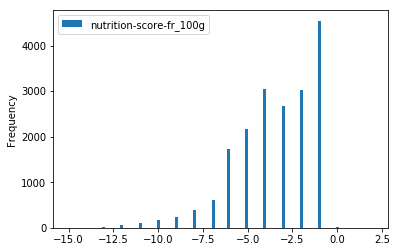

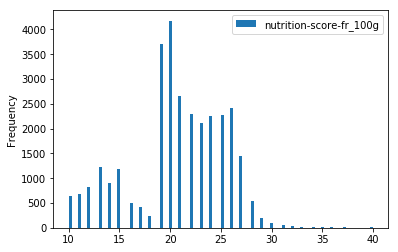

In [158]:
Food_compon_Nutri.loc[Food_compon_Nutri.nutrition_grade_fr == 'a', ['nutrition-score-fr_100g']].plot.hist(bins = 100)
Food_compon_Nutri.loc[Food_compon_Nutri.nutrition_grade_fr == 'e', ['nutrition-score-fr_100g']].plot.hist(bins = 100)

In [135]:
len(Nutri_Score_Data)

136569

In [131]:
len(Data_raw)

681575

In [132]:
len(Food_components)

588522

In [124]:
len(Nutri_Score_Data)/len(Data_raw)

0.20036766324042476

In [92]:
Boissons = Data_raw.categories.str.contains('Boissons', case = False)
Boissons.dropna(inplace = True)
len(Boissons[Boissons])

21058

In [84]:
Boissons_1 = Data_raw.categories_tags.str.contains('beverages', case = False)
Boissons_1.dropna(inplace = True)
len(Boissons_1[Boissons_1])


69907

In [77]:
Boissons_2 = Data_raw.categories_en.str.contains('Beverages', case = False)
Boissons_2.dropna(inplace = True)
len(Boissons_2[Boissons_2])

69907

In [7]:
df_to_complete.head()

,categories_tags,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,fiber_100g,proteins_100g
code,,,,,,,,,,,
0000000001281,"en:pies,en:sweet-pies,en:coconut-pies",1594.0,22.0,15.5,21.9,0.100,0.039370,NaN,NaN,4.4,4.6
0000000001885,"en:plant-based-foods-and-beverages,en:plant-ba...",657.0,0.0,0.0,27.0,0.000,0.000000,NaN,NaN,3.6,0.6
0000000005470,"en:plant-based-foods-and-beverages,en:plant-ba...",669.0,2.2,0.5,0.6,0.358,0.140945,NaN,NaN,1.6,9.5
0000000005661,"en:seafood,en:fishes,en:salmons,en:smoked-fish...",1059.0,17.0,2.6,0.5,2.500,0.984252,NaN,NaN,NaN,23.0
0000000020114,en:dietary-supplements,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [30]:
def get_smallest_relevant_tag(dic, tags, threshold = 5):
    """ Return the least frequent tag from the list, who however has more than 'threshold' 
    correspondancies in the database """
    dict_ = {}
    sort = []
    
    for tag in tags:
        dict_[tag] = dic[tag]
        
    dict_ = {k: v for k, v in dict_.items() if v >= threshold}
    if len(dict_) > 0:
        sort = sorted(dict_, key=dict_.get, reverse=True)
        return sort[-1]
    else :
        return None    

In [31]:
for i in range(len(df_to_complete)):
    
    if (i % 100==0):
        print(str(i*100/len(df_to_complete))[:6],'%')
    
    tags = df_to_complete.iloc[i].categories_tags.split(',')
    tag = get_smallest_relevant_tag(dic, tags)
    
    if tag != None :
        df_for_average = df_to_complete[df_to_complete.categories_tags.str.contains(tag, case = False)]
        for j in range(1,len(df_to_complete.columns)):
            if str(df_to_complete.iloc[i][j]) == 'nan':
                df_for_average_ = df_to_complete[df_to_complete.columns[j]]
                df_for_average_ = df_for_average_.dropna(axis=0)
                if len(df_for_average_) > 0:
                    df_to_complete.iat[i, j] = np.median(df_for_average_.tolist())

0.0 %
0.0993 %
0.1986 %
0.2980 %
0.3973 %
0.4966 %
0.5960 %
0.6953 %
0.7947 %
0.8940 %
0.9933 %
1.0927 %


KeyboardInterrupt: 